In [1]:
import pandas as pd
import numpy as np

In [2]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
fish_data = [[l,w] for l,w in zip(length,weight)]
fish_target = [1]*len(bream_length) + [0]*len(smelt_length)


In [4]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [5]:
kn.fit(fish_data,fish_target)

KNeighborsClassifier()

In [6]:
# n_nighbors = 49   1.0보다 점수가 낮았다..
# n_nighbors 이 값이 1.0보다 낮아지는 순간이 언제인지 확인
for n in range(5,50):
    kn.n_neighbors = n
    # 점수를 계산
    score = kn.score( fish_data, fish_target )
    # 100에 미치지 못하는 정확성을 나타내는 이웃의 개수
    if score < 1:
        print(n, score)
        break    

18 0.9795918367346939


In [10]:
train_data,train_target = fish_data[:35], fish_target[:35]
test_data, test_target = fish_data[35:], fish_target[35:]

In [13]:
kn = KNeighborsClassifier()
kn.fit(train_data,train_target)

KNeighborsClassifier()

In [14]:
kn.score(test_data,test_target)

0.0

In [15]:
# 학습한 데이터는 전체분류 데이터중에 특정 부류만 속해있거나 원등히 많은경우 

In [27]:
np.random.seed(42)
index = np.arange(49)

In [28]:
np.random.shuffle(index)

In [29]:
index[:6]

array([13, 45, 47, 44, 17, 27])

In [43]:
fish_data = np.array(fish_data)
fish_target = np.array(fish_target)

In [49]:
train_data = fish_data[index[:35]]
train_target = fish_target[index[:35]]
test_data = fish_data[index[35:]]
test_target = fish_target[index[35:]]

In [50]:
train_data.shape,train_target.shape

((35, 2), (35,))

In [51]:
test_data.shape,test_target.shape

((14, 2), (14,))

In [53]:
import matplotlib.pyplot as plt

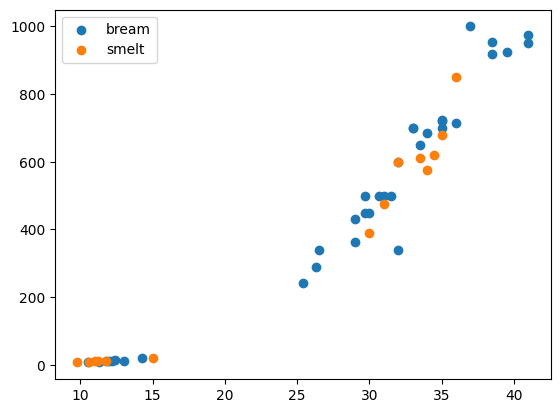

In [54]:
plt.scatter(train_data[:,0], train_data[:,1], label = 'bream')
plt.scatter(test_data[:,0], test_data[:,1], label = 'smelt')
plt.legend()
plt.show()

In [55]:
# 머신러닝을 학습하고 - 학습용 데이터로
# score 값을 확인 - 검증용 데이터로
kn = KNeighborsClassifier()  # 모델선택
kn.fit(train_data,train_target) # 학습
kn.score(test_data,test_target) # 평가

1.0

In [59]:
# 25 150
# 1 도미  0 빙어
kn.predict([[25,150]])

array([0])

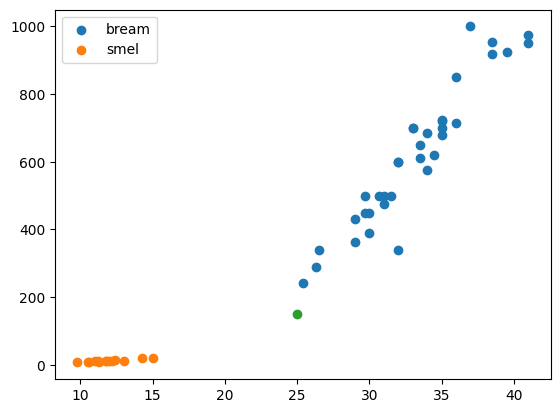

In [60]:
plt.scatter(bream_length,bream_weight,label = "bream")
plt.scatter(smelt_length,smelt_weight,label = 'smel')
plt.scatter(25,150)
plt.legend()
plt.show()

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test =  train_test_split(fish_data,fish_target)

In [80]:
# 학습용데이터
print(x_train.shape, y_train.shape)
# 검증용데이터
print(x_test.shape, y_test.shape)

(36, 2) (36,)
(13, 2) (13,)


In [81]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn.predict([[25,150]])

array([0])

In [82]:
distance, indexs =  kn.kneighbors([[25,150]])

In [83]:
indexs

array([[11, 14,  4, 33, 23]], dtype=int64)

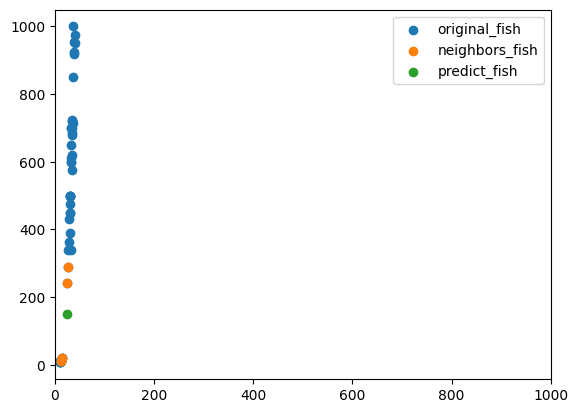

In [88]:
plt.scatter(fish_data[:,0],fish_data[:,1],label = "original_fish")
plt.scatter(x_train[indexs,0],x_train[indexs,1],label = 'neighbors_fish')
plt.scatter(25,150,label = 'predict_fish')
plt.xlim((0,1000))  # 기준을 맞춰서 보면 머신러닝이 데이터를 어떻게 판단하는지 시각적으로 볼수 있음
plt.legend()
plt.show()

# 데이터를 표준화 시키기
    각데이터를 - 평균 / 표준편차
    fish_data 를 표준화시키고  학습용과 검증용으로 분리해서 학습하고 예측

In [137]:
mean = np.mean(fish_data,axis=0)
std = np.std(fish_data,axis=0)

In [138]:
fish_data_scaled = (fish_data - mean) / std

In [140]:
x_train,x_test,y_train,y_test = train_test_split(fish_data_scaled, fish_target)

In [141]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
print(kn.score(x_test,y_test))
predict_data_scaled = (np.array([[25,150]])-mean) / std
print(kn.predict(predict_data_scaled))
distance, index = kn.kneighbors(predict_data_scaled)

1.0
[1]


In [144]:
predict_data_scaled

array([[-0.20271784, -0.90677444]])

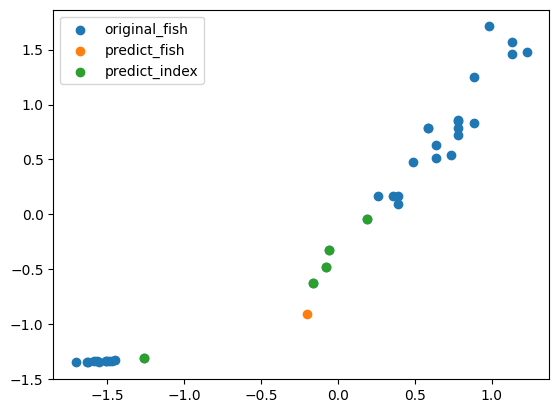

In [146]:
plt.scatter(x_train[:,0],x_train[:,1],label = "original_fish")
plt.scatter(predict_data_scaled[:,0],predict_data_scaled[:,1],label = "predict_fish")
plt.scatter(x_train[index,0],x_train[index,1],label = "predict_index")

plt.legend()
plt.show()